<a href="https://colab.research.google.com/github/mig7avilg-dot/DATA_SCIENCE/blob/master/HANDS_ON_GRUPO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load & Standardize the Dataset
digits = load_digits()
scalar = StandardScaler()
scalar.fit(digits.data)
X_std = scalar.transform(digits.data)

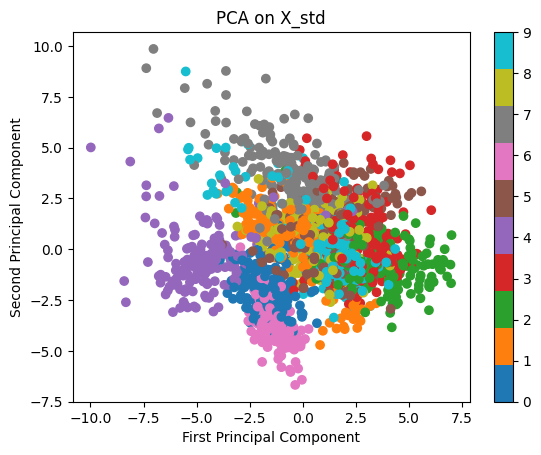

In [ ]:
# 2) Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
plt.scatter(X_pca[:,0], X_pca[:,1], c=digits.target, cmap='tab10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on X_std')
plt.colorbar();

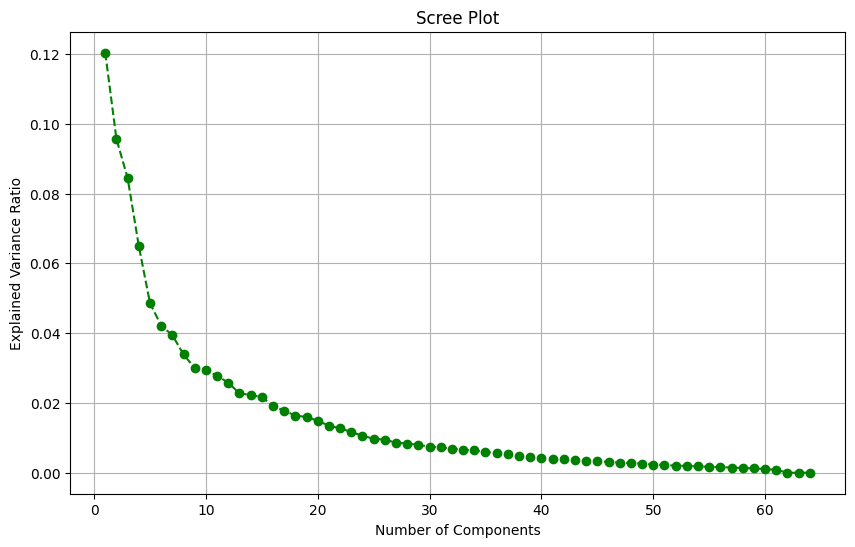

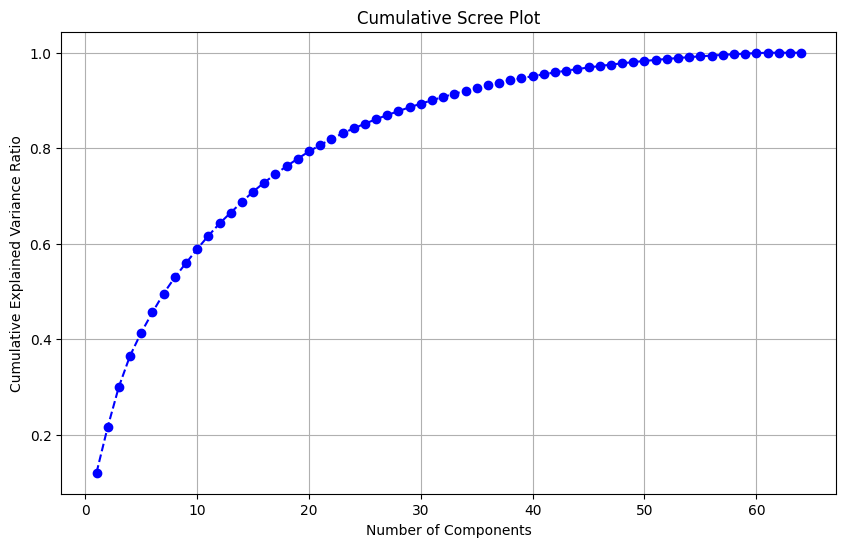

In [ ]:
# Plot the scree plot of explained variance ratio and the cumulative explained
pca_full_std = PCA(n_components=None)
pca_full_std.fit(X_std)
exp_variance_ratio = pca_full_std.explained_variance_ratio_
cum_exp_variance_ratio = np.cumsum(exp_variance_ratio)

plt.figure(figsize=(10,6))
plt.plot(range(1,len(exp_variance_ratio)+1), exp_variance_ratio, marker = 'o', linestyle = '--', color = 'g')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()
plt.figure(figsize = (10,6))
plt.plot(range(1,len(cum_exp_variance_ratio)+1), cum_exp_variance_ratio, marker = 'o' , linestyle = '--', color = 'b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Scree Plot')
plt.grid()
plt.show()

In [ ]:
#Report the minimum number of components to explain at least 95% of the variance.
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_std)
print(f'The minimum number of components to explain at least 95% of the variance is {pca_95.n_components_}')

The minimum number of components to explain at least 95% of the variance is 40
